In [1]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_stata("callreports_final.dta", chunksize=100000, preserve_dtypes=True)

df_raw = pd.DataFrame()

for chunk in data:
    df_raw=df_raw.append(chunk)

In [2]:
%matplotlib inline
import numpy as np
import seaborn as sns
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
pd.set_option('mode.chained_assignment', None)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 18

plt.style.use('ggplot')


plt.rcParams['font.size']=BIGGER_SIZE          # controls default text sizes
plt.rcParams['axes.titlesize']=BIGGER_SIZE     # fontsize of the axes title
plt.rcParams['axes.labelsize']=BIGGER_SIZE    # fontsize of the x and y labels
plt.rcParams['xtick.labelsize']=BIGGER_SIZE    # fontsize of the tick labels
plt.rcParams['ytick.labelsize']=BIGGER_SIZE    # fontsize of the tick labels
plt.rcParams['legend.fontsize']=BIGGER_SIZE    # legend fontsize
plt.rcParams['figure.titlesize']=BIGGER_SIZE  # fontsize of the figure title

from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

#plt.rcParams['legend.fontsize'] = 22

In [3]:
df_assets = df_raw[["rssdid", "name", 'year', "quarter","assets", "cash","fedfundsrepoasset" ,"securities","loansnet", "tradingassets", "interestratederivatives"]]
df_liab = df_raw[["rssdid", "name", 'year', "quarter","assets", "equity","fedfundsrepoliab" ,"deposits","foreigndep", "otherborrowedmoney", "tradingliabilities", "liabilities"]]
df_asset_median = df_assets.groupby(["year", "quarter"]).median()
df_liab_median = df_liab.groupby(["year", "quarter"]).median()
df_asset_median = df_asset_median.reset_index()
df_liab_median = df_liab_median.reset_index()
df_liab_median

,year,quarter,rssdid,assets,equity,fedfundsrepoliab,deposits,foreigndep,otherborrowedmoney,tradingliabilities,liabilities
0,1976.0,1.0,518859.0,15427.0,1256.0,0.0,13999.0,0.0,0.0,NaN,14197.0
1,1976.0,2.0,519300.0,15886.5,1295.0,0.0,14327.5,0.0,0.0,NaN,14636.5
2,1976.0,3.0,519183.5,16266.0,1346.0,0.0,14676.5,0.0,0.0,NaN,14952.0
3,1976.0,4.0,519146.0,16866.0,1348.0,0.0,15269.0,0.0,0.0,NaN,15524.0
4,1977.0,1.0,518859.0,17211.0,1398.0,0.0,15547.0,0.0,0.0,NaN,15790.0
5,1977.0,2.0,518849.5,17659.0,1433.5,0.0,15846.0,0.0,0.0,NaN,16161.5
6,1977.0,3.0,518429.5,18157.5,1488.5,0.0,16296.5,0.0,0.0,NaN,16683.5
7,1977.0,4.0,518279.0,19128.0,1492.0,0.0,17300.0,0.0,0.0,NaN,17569.0
8,1978.0,1.0,518550.0,19297.0,1551.0,0.0,17410.0,0.0,0.0,NaN,17753.0
9,1978.0,2.0,518617.0,20070.0,1602.5,0.0,18026.0,0.0,0.0,NaN,18469.0


In [7]:
df_assets_4 = df_assets[df_assets.quarter==4]
df_assets_4.set_index("rssdid", inplace=True)
df_assets_4[df_assets_4.assets>10000000000]

,name,year,quarter,assets,cash,fedfundsrepoasset,securities,loansnet,tradingassets,interestratederivatives
rssdid,,,,,,,,,,


In [ ]:
fig, ax = plt.subplots(figsize=(20,12))
df_1980 = df_assets_4[df_assets_4.year==1980]
#df_1980 = df_1980[df_1980.assets<100000]
#print(df_1980)
bins = [0, 100000, 1000000, 10000000, 100000000]
ax.ticklabel_format(useOffset=False, style='plain')
n, bins, patches = ax.hist(df_1980.assets,bins=bins, density=True)
ax.set_xticks(bins)
#print(df_1980[df_1980.assets>1000000])
print(n)



In [6]:


freq_df = pd.DataFrame()

year = 1980


for i in range(7):
    temp_df = df_assets_4[df_assets_4.year==year]
    
    temp_freq = temp_df.assets.apply(pd.Series.value_counts, bins=[0.001, 100000, 1000000, 10000000, 10000000000])
    
    s = temp_freq.apply(np.sum, axis=0)
    print(s)
    freq_df = freq_df.append(s, ignore_index=True)
    
    year = year + 5

    

#freq_df['sortkey']=s_df.index.map(lambda x : x.left)
#freq_df=freq_df.sort_values('sortkey')
#freq_df.drop(["sortkey"], axis=1, inplace=True)

freq_df
    

(-0.001, 100000.0]             12717.0
(10000000.0, 10000000000.0]       18.0
(1000000.0, 10000000.0]          174.0
(100000.0, 1000000.0]           1507.0
dtype: float64
(-0.001, 100000.0]             11674.0
(10000000.0, 10000000000.0]       27.0
(1000000.0, 10000000.0]          287.0
(100000.0, 1000000.0]           2287.0
dtype: float64
(-0.001, 100000.0]             9145
(10000000.0, 10000000000.0]      49
(1000000.0, 10000000.0]         325
(100000.0, 1000000.0]          2693
dtype: int64
(-0.001, 100000.0]             6613
(10000000.0, 10000000000.0]      75
(1000000.0, 10000000.0]         342
(100000.0, 1000000.0]          2843
dtype: int64
(-0.001, 100000.0]             4810
(10000000.0, 10000000000.0]      80
(1000000.0, 10000000.0]         307
(100000.0, 1000000.0]          3055
dtype: int64
(-0.001, 100000.0]             3435
(10000000.0, 10000000000.0]      80
(1000000.0, 10000000.0]         381
(100000.0, 1000000.0]          3562
dtype: int64
(-0.001, 100000.0]            

,"(-0.001, 100000.0]","(100000.0, 1000000.0]","(1000000.0, 10000000.0]","(10000000.0, 10000000000.0]"
0,12717.0,1507.0,174.0,18.0
1,11674.0,2287.0,287.0,27.0
2,9145.0,2693.0,325.0,49.0
3,6613.0,2843.0,342.0,75.0
4,4810.0,3055.0,307.0,80.0
5,3435.0,3562.0,381.0,80.0
6,2313.0,3670.0,413.0,83.0


In [75]:

freq_df_T = freq_df.T
freq_df_T.rename(columns={0 : "1980", 1 : "1985", 2: "1990", 3: "1995", 4: "2000", 5: "2005", 6: "2010"}, inplace=True)
freq_df_T


,1980,1985,1990,1995,2000,2005,2010
"(-0.001, 100000.0]",12717.0,11674.0,9145.0,6613.0,4810.0,3435.0,2313.0
"(100000.0, 1000000.0]",1507.0,2287.0,2693.0,2843.0,3055.0,3562.0,3670.0
"(1000000.0, 10000000.0]",174.0,287.0,325.0,342.0,307.0,381.0,413.0
"(10000000.0, 10000000000.0]",18.0,27.0,49.0,75.0,80.0,80.0,83.0


Text(0.5, 1.0, 'Count of banks per assets intervall')

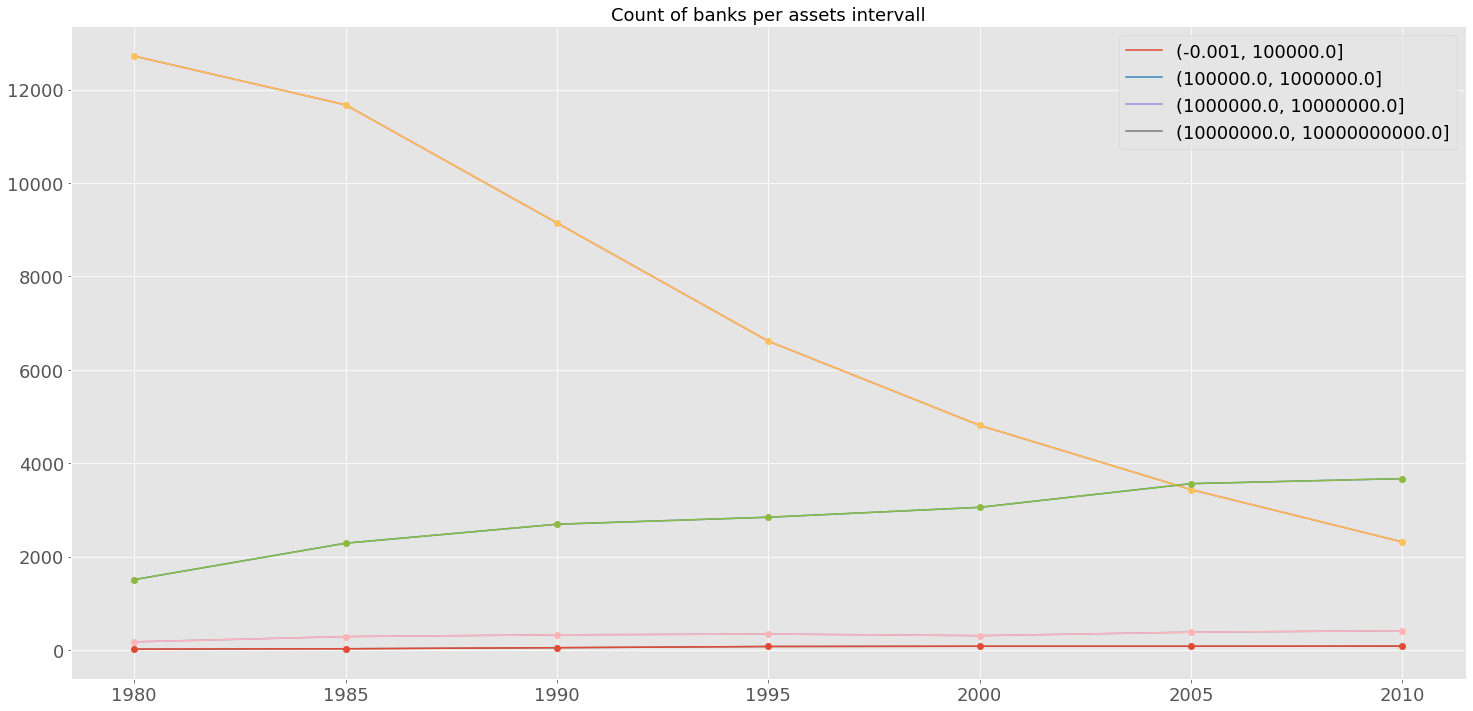

In [76]:
fig, ax = plt.subplots(figsize=(25,12))
freq_df_T_T = freq_df_T.T
series = freq_df_T_T.iloc[:,0]
df2 = pd.DataFrame(series)
ax.plot(freq_df_T_T)
ax.plot(freq_df_T_T, "o-")
ax.legend(freq_df_T_T.columns)
#freq_df_T_T.iloc[:,0].plot()
ax.set_title("Count of banks per assets intervall")

In [ ]:
frequency_df = df_1980.assets.apply(pd.Series.value_counts, bins=[0, 100000, 1000000, 10000000, 1000000000])
frequency_df


In [ ]:
s = frequency_df.apply(np.sum, axis=0)
s_df = pd.DataFrame(s, columns=["assets"])
s_df['sortkey']=s_df.index.map(lambda x : x.left)
s_df=s_df.sort_values('sortkey')
s_df.drop(["sortkey"], axis=1, inplace=True)

In [ ]:


s_df.index = s_df.index.astype(str)

fig, ax = plt.subplots(figsize=(20,12))

s_df.plot.bar(ax=ax)
ax.set_xticklabels(clean_frequency_df.index, rotation=0)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.09, p.get_height() * 1.025))

In [ ]:
print(frequency_df)
sum1 = frequency_df.iloc[:,0].sum()
sum2 = frequency_df.iloc[:,1].sum()
sum3 = frequency_df.iloc[:,2].sum()
sum4 = frequency_df.iloc[:,3].sum()
dic = { "(-0.001, 100000.0]" : sum1, "(100000.0, 1000000.0]" : sum4, "(1000000.0, 10000000.0]" : sum3, "10000000.0, 100000000.0": sum2 }
clean_frequency_df = pd.Series(dic)
clean_frequency_df

fig, ax = plt.subplots(figsize=(20,12))

clean_frequency_df.plot.bar(ax=ax)
ax.set_xticklabels(clean_frequency_df.index, rotation=0)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.10, p.get_height() * 1.025))
#df_big_banks_median = df_big_banks.groupby(["year", "quarter"]).median()
#frequency_df.groupby(frequency_df.index ,axis="columns").sum


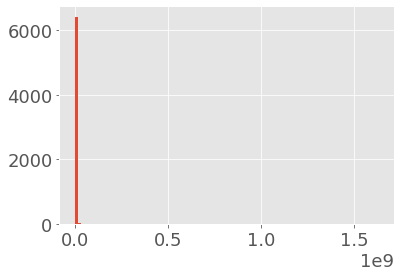

In [57]:
fig, ax = plt.subplots()
n, bins, patches = ax.hist(df_2000.assets, bins=100) #to preset bins for next graph

count    6.479000e+03
mean     1.841031e+06
std      3.499095e+07
min      1.391000e+03
25%      7.306900e+04
50%      1.450250e+05
75%      3.105070e+05
max      1.631621e+09
Name: assets, dtype: float64

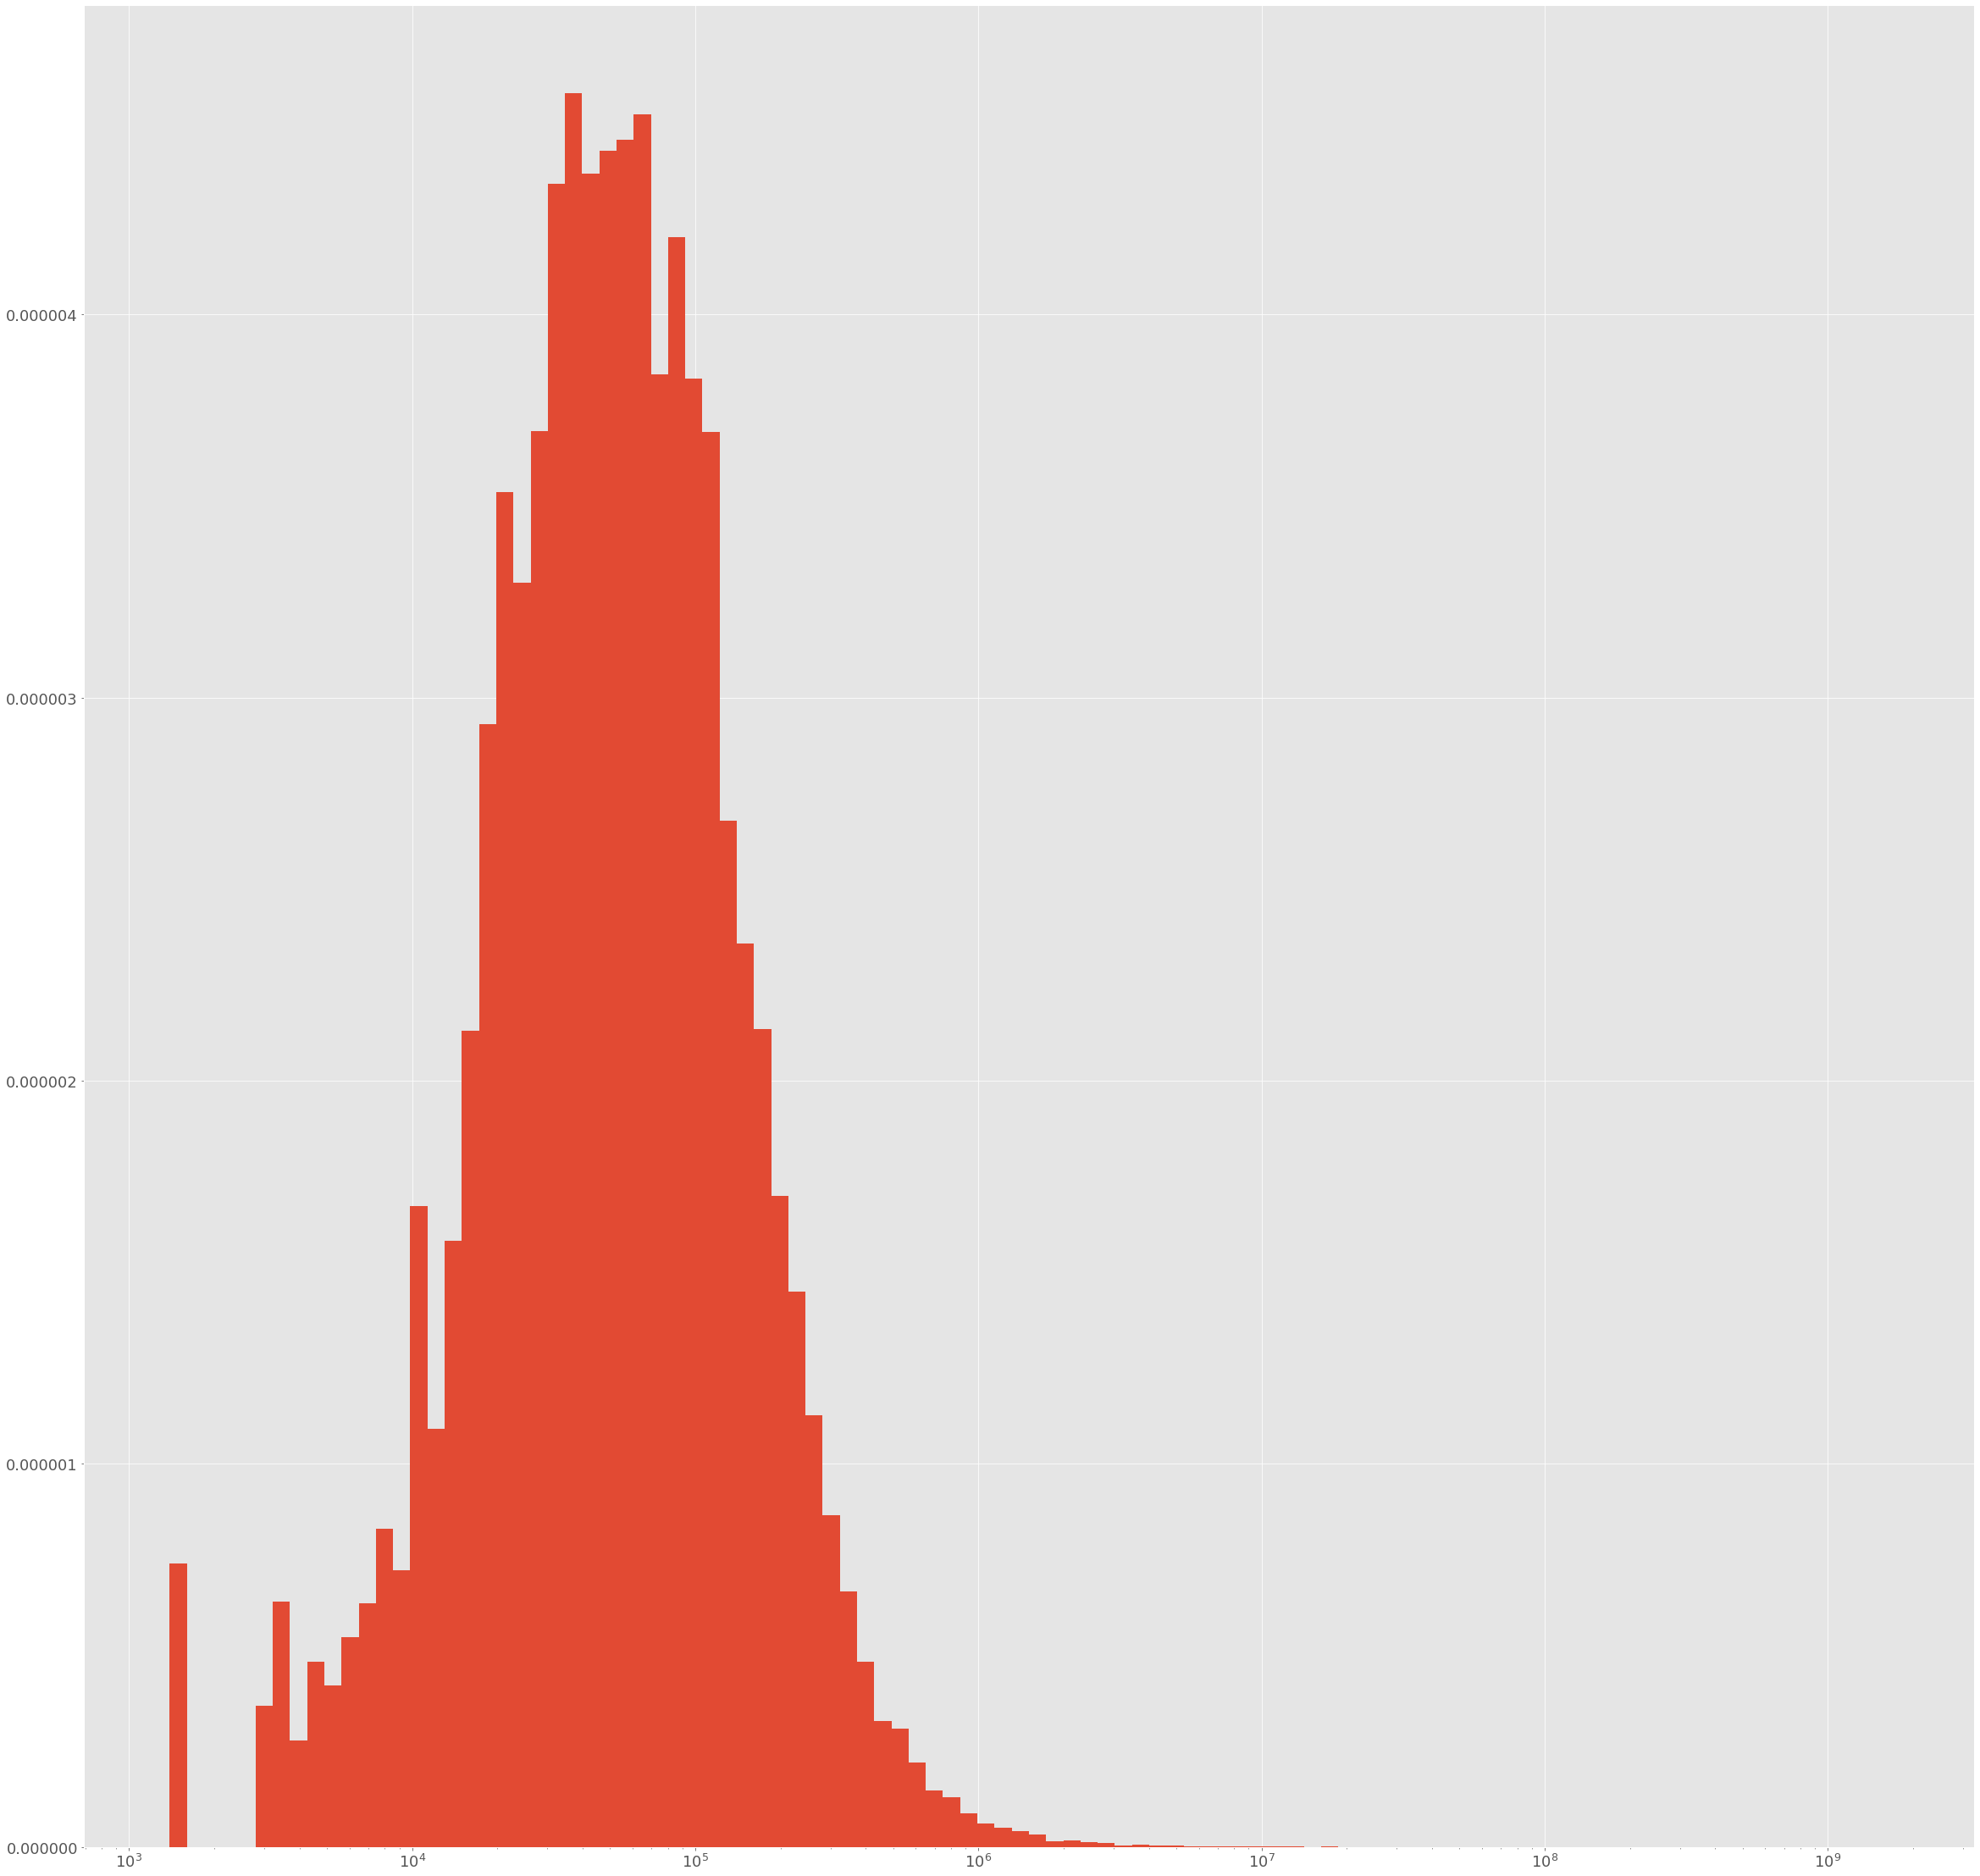

In [69]:
fig, ax = plt.subplots(figsize=(40,40))
df_2000 = df_assets_4[df_assets_4.year==2010]
#df_2000 = df_2000[df_2000.assets<100000]
#print(df_1980)
ax.ticklabel_format(useOffset=False, style='plain')
#n, bins, patches = ax.hist(df_2000.assets, bins=500)
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
n, bins, patches = ax.hist(df_2000.assets,bins=logbins, density=True)
plt.xscale('log')
df_2000.assets.describe()


array([1.39100000e+03, 8.29719805e+04, 1.64552961e+05, ...,
       1.63145784e+09, 1.63153942e+09, 1.63162100e+09])

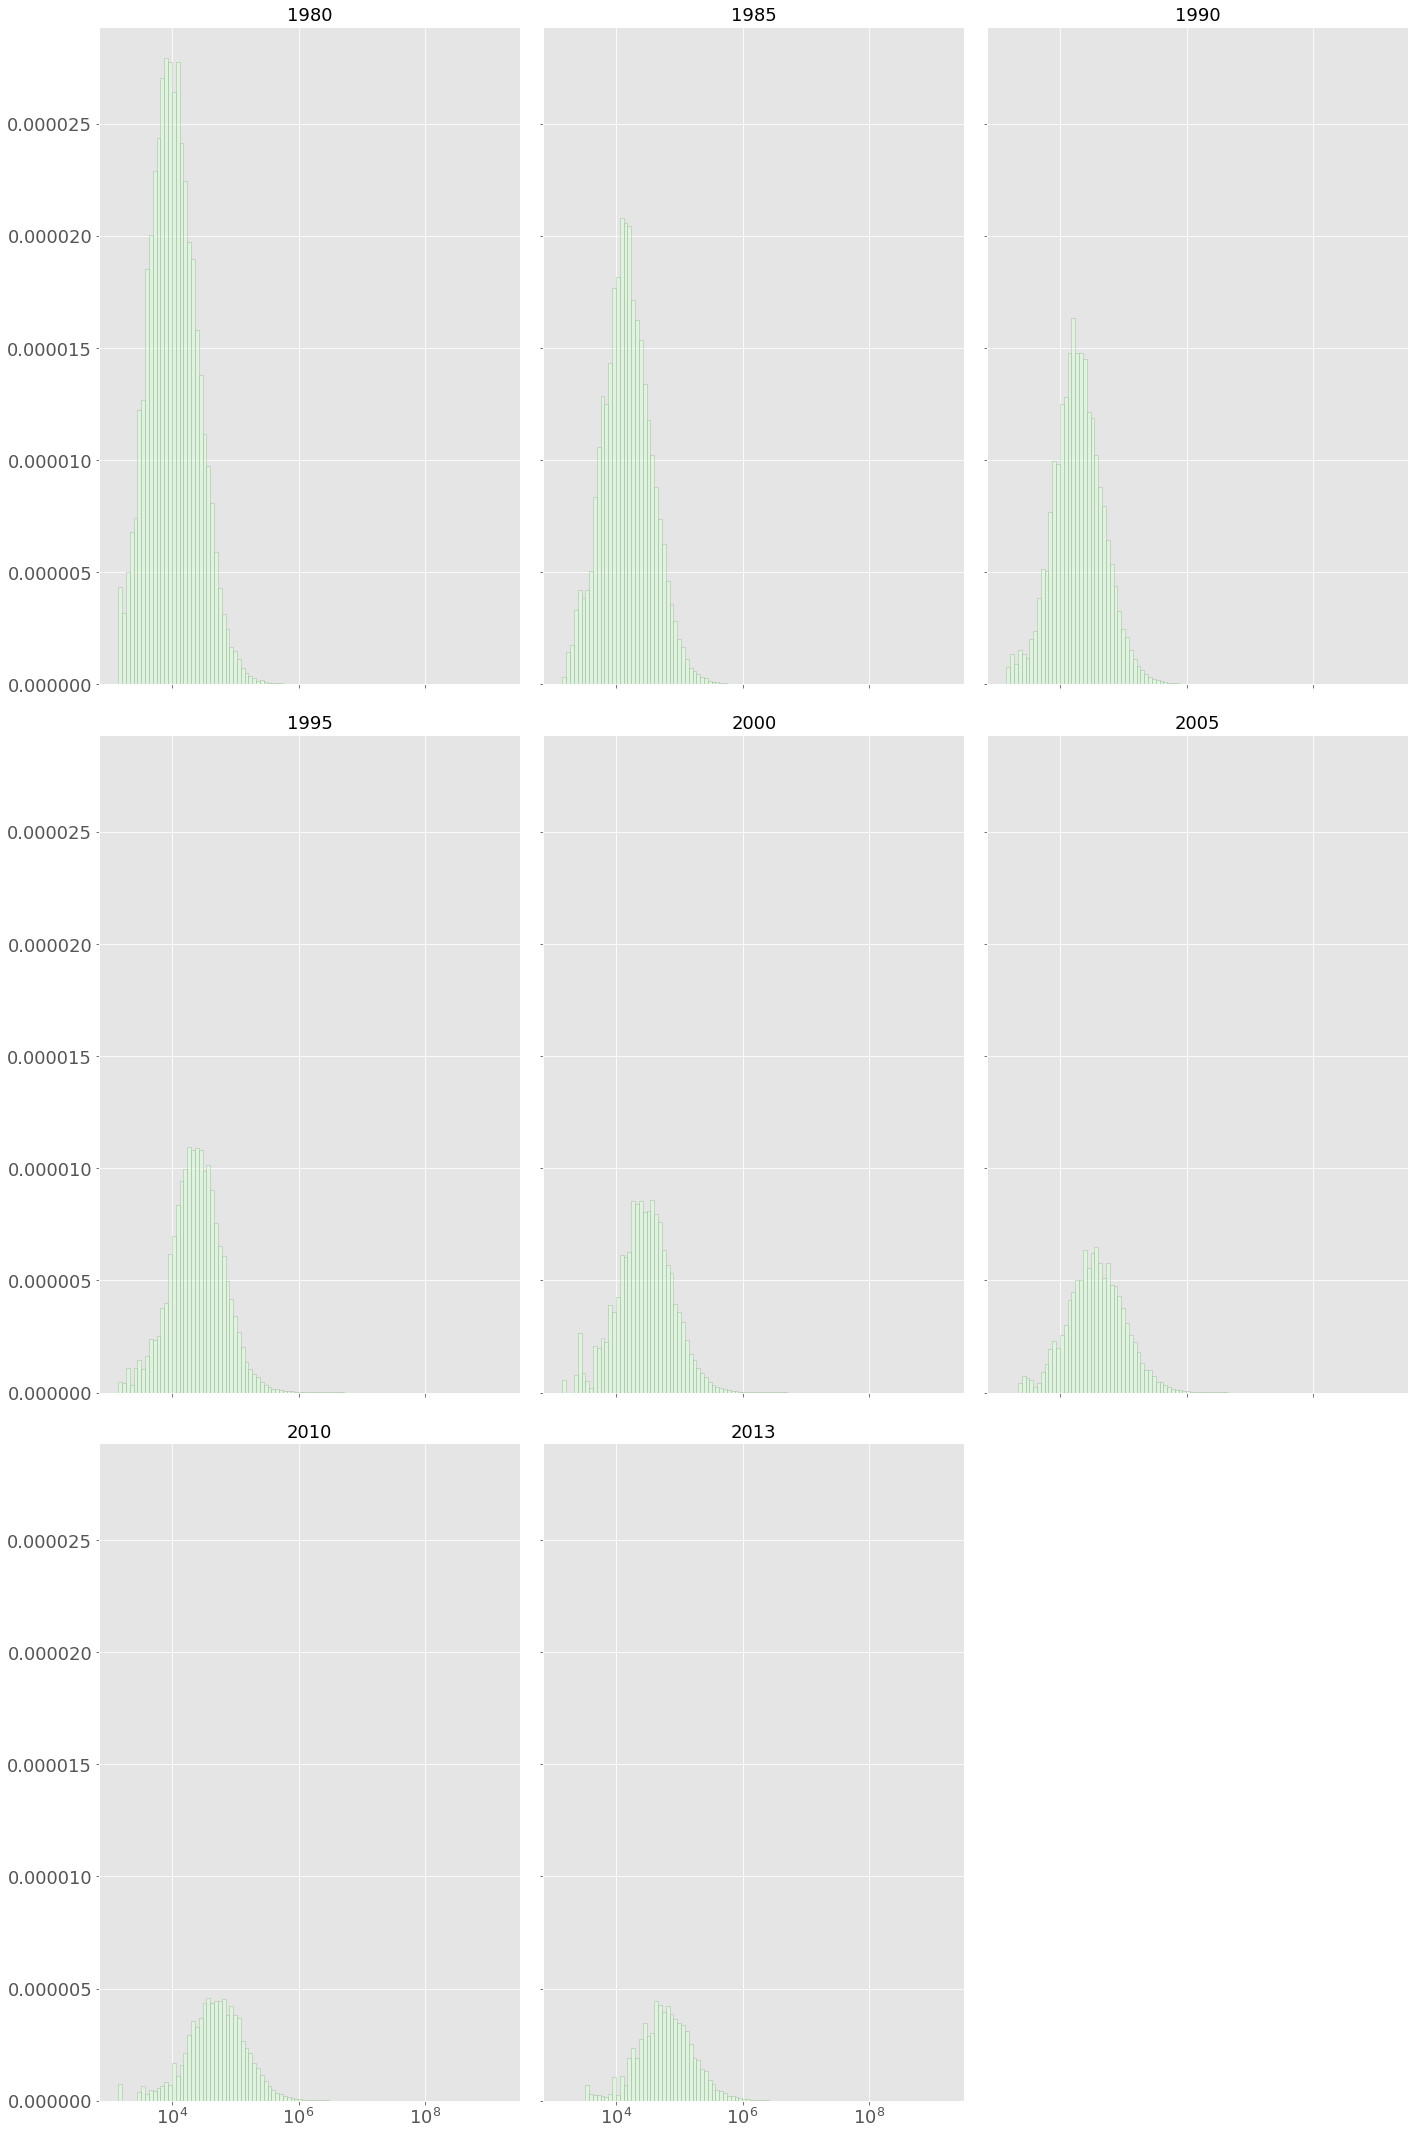

In [64]:
#df = df_all.reset_index(level="year")
#print(df[df.leverageRatio>20])
#df = df[(df.leverageRatio > 0)]
#print(df)
fig, ax = plt.subplots(3, 3, figsize=(20,30), sharey=True, sharex=True)
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
ax = ax.ravel() 
year=1980
x = 0
temp_df = pd.DataFrame()
for x in range(7):
    temp_df = df_assets_4[df_assets_4.year==year]
    #print(temp_df.assets)
    plt.xscale('log')
    n, bins, patches = ax[x].hist(temp_df.assets, bins=logbins ,density=True, alpha=0.5, edgecolor="#6A9662",color="#DDFFDD")
    ax[x].set_title(year)
    #ax[x].set(xticks=bins)
    #ax[x].text(14.5,0.12,temp_df.assets.describe().round(2).to_string())
    #ax[x].text(16.5,0.175, "Mean: " + str(round(temp_df.leverageRatio.mean(),2)))
    #ax[x].text(17,0.165, "Median: " + str(temp_df.leverageRatio.median()))
    #for tick in ax[x].get_xticklabels():
        #tick.set_rotation(60)
    #print(bins)
    #ax[x].set_xticklabels(bins, rotation=60)
    year = year + 5
    
year = year - 2
temp_df = df_assets_4[df_assets_4.year==year]
n, bins, patches = ax[7].hist(temp_df.assets, bins=logbins ,density=True, alpha=0.5, edgecolor="#6A9662",color="#DDFFDD")
#for tick in ax[7].get_xticklabels():
#        tick.set_rotation(60)
ax[7].set_title(year)
#ax[1].text(1,1, temp_df.leverageRatio.mean())
#ax[7].set(xticks=bins)
#ax[7].text(14,0.12,temp_df.assets.describe().round(2).to_string())
fig.delaxes(ax[8])
#fig.suptitle('Categorical Plotting')
#plt.subplots_adjust(left=0.1, bottom=0.02, right=0.75)
plt.tight_layout()
plt.savefig('LatexVorlage/graphs/Leverage/MedianBank_AssetDistribution_8013.png')
#y = temp_df.leverageRatio.describe()
#print(type(y))


In [221]:
#def choose_median(x):
#    x = x[x.assets==]  
#    return x

df_big_banks_liab = df_liab[df_liab.assets >= 10000000]
df_big_banks_median_liab = df_big_banks_liab.groupby(["year", "quarter"])["assets"].median()
df_big_banks_median_liab.reset_index()

,year,quarter,assets
0,1976.0,1.0,21661737.0
1,1976.0,2.0,20701793.0
2,1976.0,3.0,20770637.0
3,1976.0,4.0,21759871.0
4,1977.0,1.0,21769519.0
5,1977.0,2.0,21711213.5
6,1977.0,3.0,21572537.0
7,1977.0,4.0,22800123.0
8,1978.0,1.0,22902366.0
9,1978.0,2.0,24133536.0


In [220]:
df_big_banks_liab = df_liab[df_liab.assets >= 10000000]
df_big_banks_median_liab = df_big_banks_liab.groupby(["year", "quarter"])["assets"].median()
temp_df = df_big_banks_median_liab.copy()
df_big_banks_median_liab.reset_index()

y = 0

def choose_median(x):
    x.sort_values(by="assets",inplace=True)
    #print(x)
    return x.iloc[int(len(x)/2),:]


temp_df = df_big_banks_liab.groupby(["year", "quarter"]).apply(lambda group: group.sort_values(by="assets").iloc[int(len(group)/2)])
#temp_df = df_big_banks_liab.groupby(["year", "quarter"]).apply(choose_median)
#print(df_big_banks_median_liab)
temp_df
#df_big_banks_liab

rssdid                          name    year  quarter      assets     equity  fedfundsrepoliab    deposits  foreigndep  otherborrowedmoney  tradingliabilities  liabilities
year   quarter                                                                                                                                                                                
1976.0 1.0       852218.0                   CHEMICAL BK  1976.0      1.0  23006895.0   939341.0         1353278.0  12395973.0   6356852.0            295308.0                 NaN   22067554.0
       2.0       279431.0  CONTINENTAL IL NB&TC CHICAGO  1976.0      2.0  20701793.0   903374.0         3272707.0   9133379.0   6543773.0            189814.0                 NaN   19798419.0
       3.0       279431.0        CONTINENTAL IL NB&TC C  1976.0      3.0  20770637.0   916702.0         3373356.0   9069048.0   6680779.0            216594.0                 NaN   19853935.0
       4.0       214807.0                    BANKERS TC  1976.0      4.0  21759871.0   879568.0         1157312.0   9018471.0   8066720.0            988704.0                 NaN   20880303.0
1977.0 1.0       279431.0        CONTINENTAL IL NB&TC C  1977.0      1.0  21769519.0  1048892.0         4190785.0   8378041.0   7271197.0            202021.0                 NaN   20720627.0
       2.0       279431.0  CONTINENTAL IL NB&TC CHICAGO  1977.0      2.0  22171807.0  1070273.0         3943791.0   9421417.0   7128504.0            231538.0                 NaN   21101534.0
       3.0       214807.0                    BANKERS TC  1977.0      3.0  21572537.0   896598.0         1443610.0   8688975.0   7594685.0            926260.0                 NaN   20675939.0
       4.0       214807.0                    BANKERS TC  1977.0      4.0  22800123.0   955141.0         2205834.0   9344726.0   7352053.0           1080101.0                 NaN   21844982.0
1978.0 1.0       214807.0                    BANKERS TC  1978.0      1.0  22902366.0   982890.0         2524243.0   8674400.0   7554044.0           1079475.0                 NaN   21919476.0
       2.0       214807.0                    BANKERS TC  1978.0      2.0  24133536.0   990424.0         1916266.0   9719720.0   8231558.0           1092581.0                 NaN   23143112.0
       3.0       214807.0                    BANKERS TC  1978.0      3.0  24383281.0   999450.0         2386182.0   9954252.0   7886654.0           1149280.0                 NaN   23383831.0
       4.0       173333.0           FIRST NB OF CHICAGO  1978.0      4.0  22797564.0  1011797.0         1942532.0   9771800.0   7757064.0            444058.0                 NaN   21785767.0
1979.0 1.0       173333.0           FIRST NB OF CHICAGO  1979.0      1.0  23916333.0  1018962.0         2754447.0   8692494.0   9553320.0            583024.0                 NaN   22897371.0
       2.0       173333.0           FIRST NB OF CHICAGO  1979.0      2.0  24715275.0  1047059.0         3603203.0   8085917.0   9367107.0            541784.0                 NaN   23668216.0
       3.0       173333.0           FIRST NB OF CHICAGO  1979.0      3.0  26458523.0  1063259.0         3235338.0   8599460.0  10915732.0            553647.0                 NaN   25395264.0
       4.0       173333.0           FIRST NB OF CHICAGO  1979.0      4.0  28984832.0  1069320.0         4055735.0   9033207.0  12136752.0            462574.0                 NaN   27915512.0
1980.0 1.0       214807.0                    BANKERS TC  1980.0      1.0  27917440.0  1085827.0         2076651.0   9884241.0  10295337.0           2002873.0                 NaN   26831613.0
       2.0       173333.0           FIRST NB OF CHICAGO  1980.0      2.0  26804391.0  1082791.0         2242704.0   8770636.0  12014333.0            454651.0                 NaN   25721600.0
       3.0       753267.0           SECURITY PACIFIC NB  1980.0      3.0  25463988.0  1159872.0         1634131.0  16379396.0   3720524.0            521027.0                 NaN   24304116.0
       4

In [199]:
df_big_banks_liab[(df_big_banks_liab.year==1976.0) & (df_big_banks_liab.quarter==1.0)].median()

rssdid                  381284.5
year                      1976.0
quarter                      1.0
assets                21661737.0
equity                  912051.5
fedfundsrepoliab       1435608.5
deposits               9738650.5
foreigndep             6413391.0
otherborrowedmoney      242410.0
tradingliabilities           NaN
liabilities           20749685.5
dtype: float64

Median banks asset side by category (small, middle, big)

In [201]:
df_big_banks_liab[(df_big_banks_liab.year==1976.0) & (df_big_banks_liab.quarter==1.0)]

,rssdid,name,year,quarter,assets,equity,fedfundsrepoliab,deposits,foreigndep,otherborrowedmoney,tradingliabilities,liabilities
231427,161415.0,MORGAN GUARANTY TC OF NY,1976.0,1.0,25503687.0,1357468.0,2226927.0,9564943.0,9985048.0,652417.0,NaN,24146219.0
247821,173333.0,FIRST NB OF CHICAGO,1976.0,1.0,17773161.0,814989.0,3062516.0,8690504.0,4602875.0,87379.0,NaN,16958172.0
309559,214807.0,BANKERS TC,1976.0,1.0,19072587.0,850975.0,1206706.0,8638872.0,6345276.0,678723.0,NaN,18221612.0
405229,279431.0,CONTINENTAL IL NB&TC C,1976.0,1.0,20316579.0,884762.0,2984359.0,8975447.0,6469930.0,189512.0,NaN,19431817.0
429201,295310.0,MANUFACTURERS HAN TC,1976.0,1.0,26637486.0,1038470.0,1248921.0,14396181.0,8104204.0,167255.0,NaN,25599016.0
502918,349361.0,BANK OF AMER NT&SA,1976.0,1.0,62889572.0,2124140.0,2132531.0,31026428.0,23933586.0,528063.0,NaN,60765432.0
595866,413208.0,MARINE MIDLAND BANK,1976.0,1.0,10637434.0,539952.0,324559.0,6779292.0,2564285.0,38320.0,NaN,10097482.0
648277,451965.0,WELLS FARGO BK NA,1976.0,1.0,11849009.0,513450.0,831209.0,8908641.0,942923.0,93257.0,NaN,11335559.0
686148,476810.0,CITIBANK NA,1976.0,1.0,55388379.0,2776877.0,2989288.0,17995247.0,26921596.0,1532606.0,NaN,52611502.0
1083423,748601.0,CHASE MANHATTAN BK NA,1976.0,1.0,42029536.0,1897142.0,1517939.0,18998085.0,15634671.0,1044301.0,NaN,40132394.0


In [296]:
#big bank
df_big_banks = df_assets[df_assets.assets >= 10000000]
df_big_banks_liab = df_liab[df_liab.assets >= 10000000]
df_big_banks_median = df_big_banks.groupby(["year", "quarter"]).median()
df_big_banks_median_liab = df_big_banks_liab.groupby(["year", "quarter"]).apply(lambda group: group.sort_values(by="assets").iloc[int(len(group)/2)])
#middle bank
df_middle_banks = df_assets[(df_assets.assets < 10000000) & (df_assets.assets >= 1000000)]
df_middle_banks_liab = df_liab[(df_liab.assets < 10000000) & (df_liab.assets >= 1000000)]
df_middle_banks_median = df_middle_banks.groupby(["year", "quarter"]).apply(lambda group: group.sort_values(by="assets").iloc[int(len(group)/2)])
df_middle_banks_median_liab = df_middle_banks_liab.groupby(["year", "quarter"]).apply(lambda group: group.sort_values(by="assets").iloc[int(len(group)/2)])
#small bank
df_small_banks = df_assets[df_assets.assets < 1000000]
df_small_banks_liab = df_liab[df_liab.assets < 1000000]
df_small_banks_median = df_small_banks.groupby(["year", "quarter"]).apply(lambda group: group.sort_values(by="assets").iloc[int(len(group)/2)])
df_small_banks_median_liab = df_small_banks_liab.groupby(["year", "quarter"]).apply(lambda group: group.sort_values(by="assets").iloc[int(len(group)/2)])

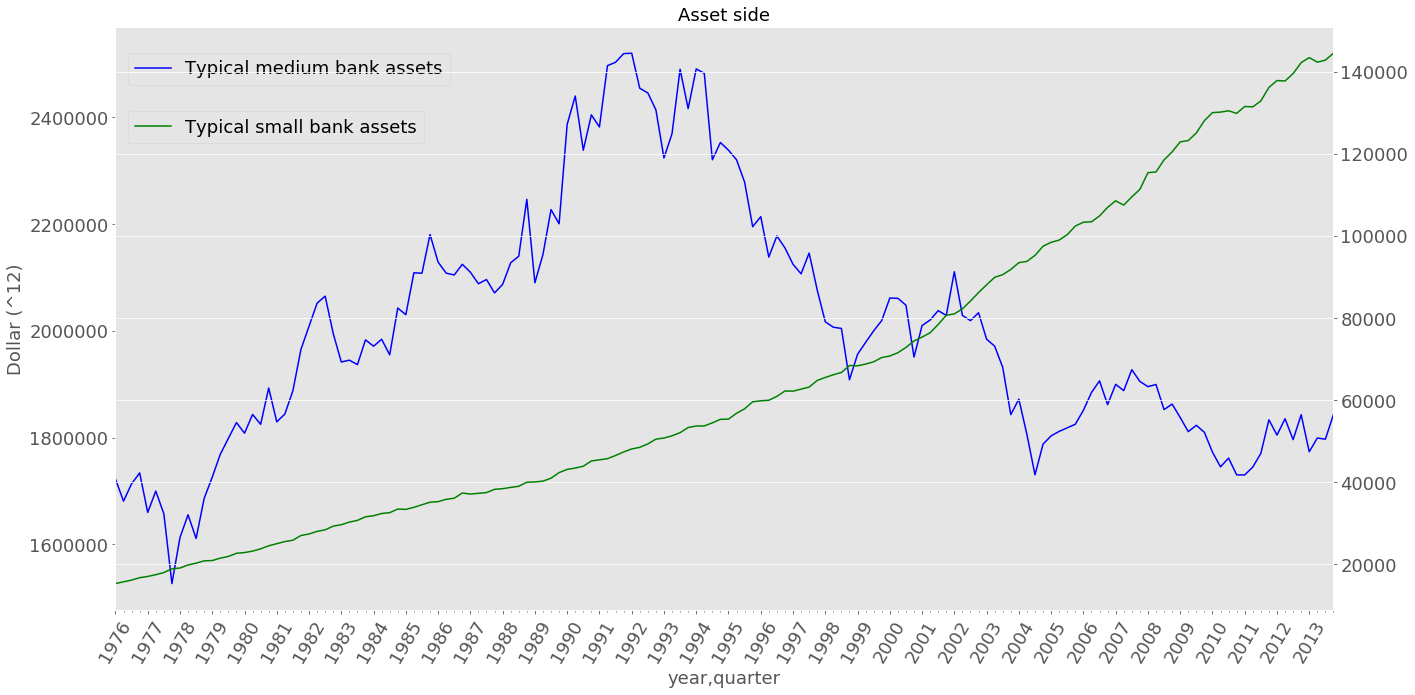

In [297]:
fig, ax = plt.subplots(figsize=(20,10))
ax2 = ax.twinx()
years = [str(year) for year in range(1976, 2014)]
ax.set_xticks(range(0,152,4))
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.set_title("Asset side")
ax.set_ylabel("Dollar (^12)")
#df_big_banks_median.assets.plot(ax=ax)
df_middle_banks_median.assets.plot(ax=ax, style="b-")
df_small_banks_median.assets.plot(ax=ax2, style="g-")
#plt.plot([df_aggOnePercent.assets, df_aggFivePercent.assets, df_aggTenPercent.assets, df_aggFiftyPercent.assets, df_agg.assets])
ax.set_xticklabels(years, rotation=60)
ax.legend(["Typical medium bank assets"],loc=(0.01, 0.9))
ax2.legend(["Typical small bank assets"], loc=(0.01, 0.8))
ax.grid()
plt.tight_layout()
plt.savefig('LatexVorlage/graphs/DescriptiveStats/OtherAnalysis_BanksAssetsperCat_7613.png')

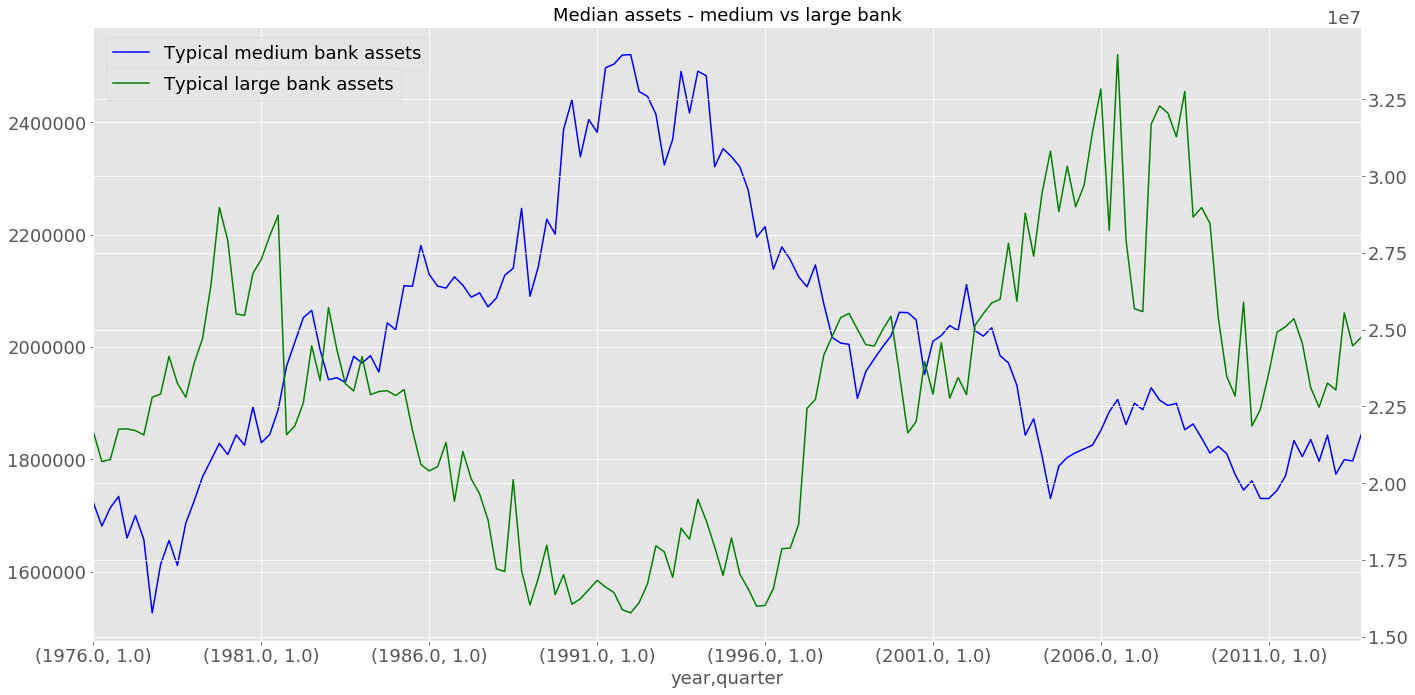

In [298]:
fig, ax = plt.subplots(figsize=(20,10))
ax2 = ax.twinx()
df_middle_banks_median.assets.plot(ax=ax, style="b-")
df_big_banks_median.assets.plot(ax=ax2, style="g-")
ax.legend(["Typical medium bank assets"],loc=(0.01, 0.93))
ax2.legend(["Typical large bank assets"], loc=(0.01, 0.88))
ax.set_title("Median assets - medium vs large bank")
plt.tight_layout()
plt.savefig('LatexVorlage/graphs/DescriptiveStats/MedianBank_MiddlevsBigMedianBankAssets_7613.png')

Comparing assets development of all three bank sizes

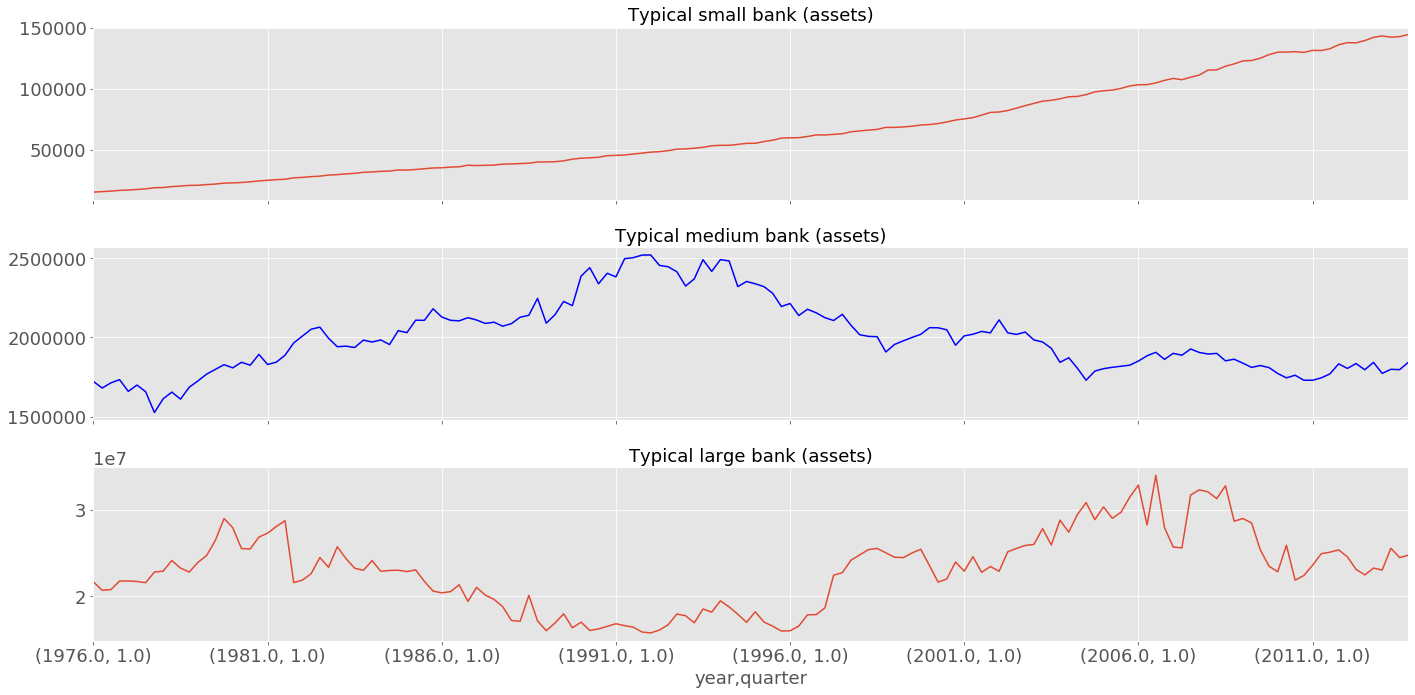

In [299]:
fig, ax = plt.subplots(3,1, figsize=(20,10) ,sharex=True)
ax = ax.ravel()

df_small_banks_median.assets.plot(ax=ax[0])
ax[0].set_title("Typical small bank (assets)")
df_middle_banks_median.assets.plot(ax=ax[1], style="b-")
ax[1].set_title("Typical medium bank (assets)")
df_big_banks_median.assets.plot(ax=ax[2])
ax[2].set_title("Typical large bank (assets)")
#fig.suptitle("Assets (small vs medium vs large)")

plt.tight_layout()
plt.savefig('LatexVorlage/graphs/DescriptiveStats/MedianBank_SmallvsMiddlevsBigMedianBankAssets_7613.png')
#ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation=60)

Small bank financing

In [300]:
df_small_banks_median_liab

rssdid                          name    year  quarter    assets   equity  fedfundsrepoliab  deposits  foreigndep  otherborrowedmoney  tradingliabilities  liabilities
year   quarter                                                                                                                                                                          
1976.0 1.0       385837.0    BARNETT BK OF PALM SPRINGS  1976.0      1.0   15276.0   1269.0             100.0   13758.0         0.0                 0.0                 NaN      14007.0
       2.0       953656.0              WEST FARGO ST BK  1976.0      2.0   15700.0   1169.0               0.0   14310.0         0.0                 0.0                 NaN      14531.0
       3.0       667122.0                   FIDELITY NB  1976.0      3.0   16119.0   1570.0               0.0   14415.0         0.0                 0.0                 NaN      14549.0
       4.0        39448.0                BANK OF OREGON  1976.0      4.0   16703.0   1022.0             446.0   14833.0         0.0                 0.0                 NaN      15681.0
1977.0 1.0       485214.0                    FARMERS BK  1977.0      1.0   17007.0   1207.0               0.0   15788.0         0.0                 0.0                 NaN      15800.0
       2.0       781868.0                      FIRST NB  1977.0      2.0   17431.0   1317.0               0.0   15525.0         0.0                 0.0                 NaN      16115.0
       3.0       761655.0            FIRST NB OF GRANTS  1977.0      3.0   17959.0   1215.0               0.0   16546.0         0.0                 0.0                 NaN      16744.0
       4.0       133908.0         ARCADIA NATIONAL BANK  1977.0      4.0   18865.0   3845.0               0.0   14856.0         0.0                 0.0                 NaN      15020.0
1978.0 1.0       672537.0                   EXCHANGE BK  1978.0      1.0   19059.0   1677.0               0.0   17239.0         0.0                 0.0                 NaN      17382.0
       2.0       827355.0            FIRST NB OF NEVADA  1978.0      2.0   19796.0   1484.0               0.0   18312.0         0.0                 0.0                 NaN      18312.0
       3.0       725657.0  FIRST MO BK OF GASCONADE CTY  1978.0      3.0   20252.0   1688.0               0.0   18016.0         0.0                 0.0                 NaN      18564.0
       4.0       773126.0                   FIDELITY BK  1978.0      4.0   20811.0   1806.0               0.0   18774.0         0.0                 0.0                 NaN      19005.0
1979.0 1.0       495231.0            MAIN BK OF LOMBARD  1979.0      1.0   20881.0   1525.0             200.0   18584.0         0.0                 0.0                 NaN      19356.0
       2.0       349129.0                 COMMERCIAL BK  1979.0      2.0   21469.0   2010.0               0.0   19320.0         0.0                 NaN                 NaN      19459.0
       3.0       216043.0    HERITAGE BK-MOUNT PLEASANT  1979.0      3.0   21883.0   1099.0              61.0   19892.0         0.0                 NaN                 NaN      20784.0
       4.0       597153.0     COMMERCE BK OF BLUE HILLS  1979.0      4.0   22651.0   1380.0             600.0   19742.0         0.0                 0.0                 NaN      21271.0
1980.0 1.0       526854.0              HARDIN COUNTY BK  1980.0      1.0   22833.0   1770.0               0.0   20546.0         0.0                 0.0                 NaN      21063.0
       2.0       231336.0                      FIRST NB  1980.0      2.0   23183.0   1075.0             100.0   21762.0         0.0                 NaN                 NaN      22108.0
       3.0       443036.0               CAPITAL CITY BK  1980.0      3.0   23734.0   2105.0               0.0   21405.0         0.0                 NaN                 NaN      21629.0
       4.0       565358.0            TOOLE COUNTY ST BK  1980.0      4.0   24482.0   2284.0               0.0   22076.0         0.0   

In [301]:
df_small_banks_median_liab.drop(["name", "year", "quarter"], axis=1, inplace=True)

df_agg_share = pd.DataFrame()

for (columnName, columnData) in df_small_banks_median_liab.iteritems():
    newcolumn = "share" + columnName
    df_agg_share[newcolumn] = df_small_banks_median_liab[columnName]/df_small_banks_median_liab.assets
    
    
df_agg_share.drop(["sharerssdid" , "shareassets", "shareliabilities"], axis=1, inplace=True)

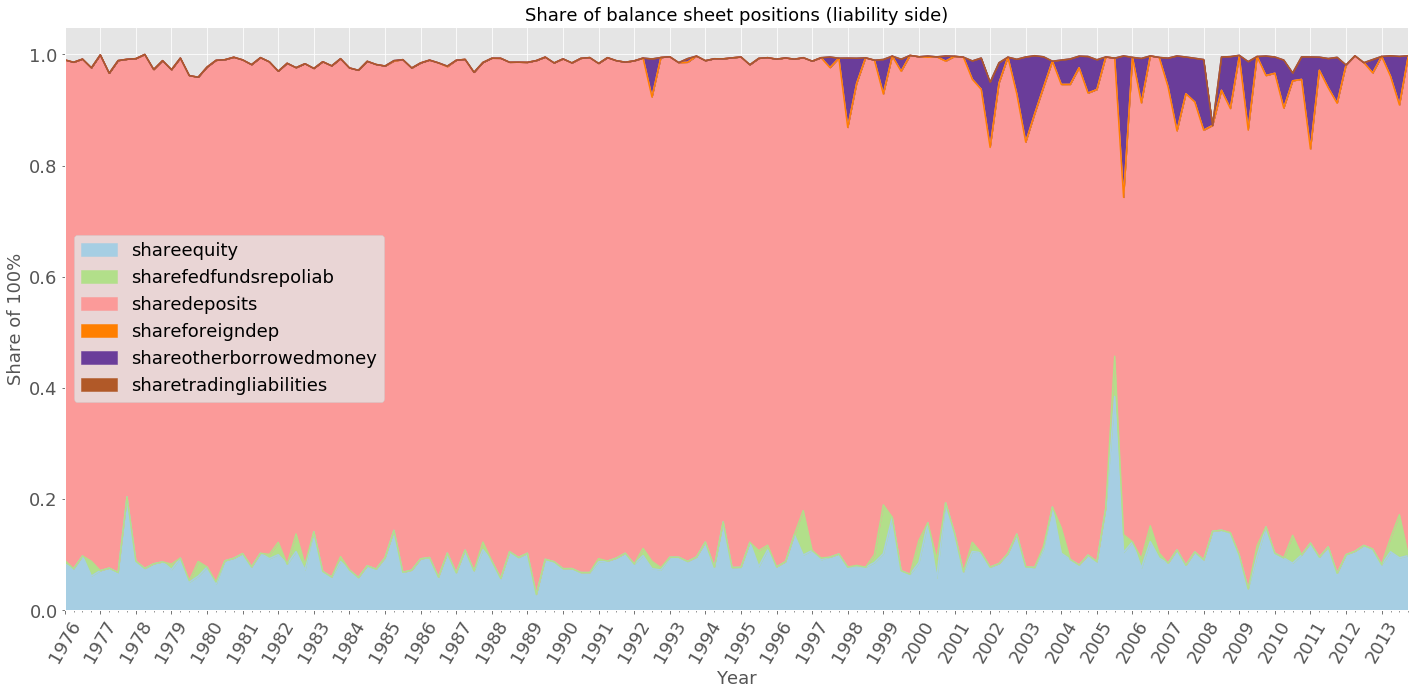

In [302]:
fig, ax = plt.subplots(figsize=(20,10))
years = [str(year) for year in range(1976, 2014)]
ax.set_xticks(range(0,152,4))
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.set_title("Share of balance sheet positions (liability side)")
ax.set_ylabel("Share of 100%")
#df_agg.assets.plot(ax=ax)
viridis = cm.get_cmap('Paired', 12)
df_agg_share.plot.area(ax=ax, colormap=viridis)
#df_agg.plot.area(ax=ax, y=["shareCash","shareFedfundsrepoasset" ,"shareSecurities","shareLoansnet", "shareTradingassets", "shareInterestratederivatives", "shareOtherassets"])
ax.set_xticklabels(years, rotation=60)
ax.legend()
ax.set_xlabel("Year")
ax.grid(True)
plt.tight_layout()
plt.savefig('LatexVorlage/graphs/DescriptiveStats/MedianBank_ShareofLiabilitiesSmallBank_7613.png')

Middle Bank

In [303]:
df_middle_banks_median_liab.drop(["name", "year", "quarter"], axis=1, inplace=True)

df_agg_share = pd.DataFrame()

for (columnName, columnData) in df_middle_banks_median_liab.iteritems():
    newcolumn = "share" + columnName
    df_agg_share[newcolumn] = df_middle_banks_median_liab[columnName]/df_middle_banks_median_liab.assets
    
    
df_agg_share.drop(["sharerssdid" , "shareassets", "shareliabilities"], axis=1, inplace=True)

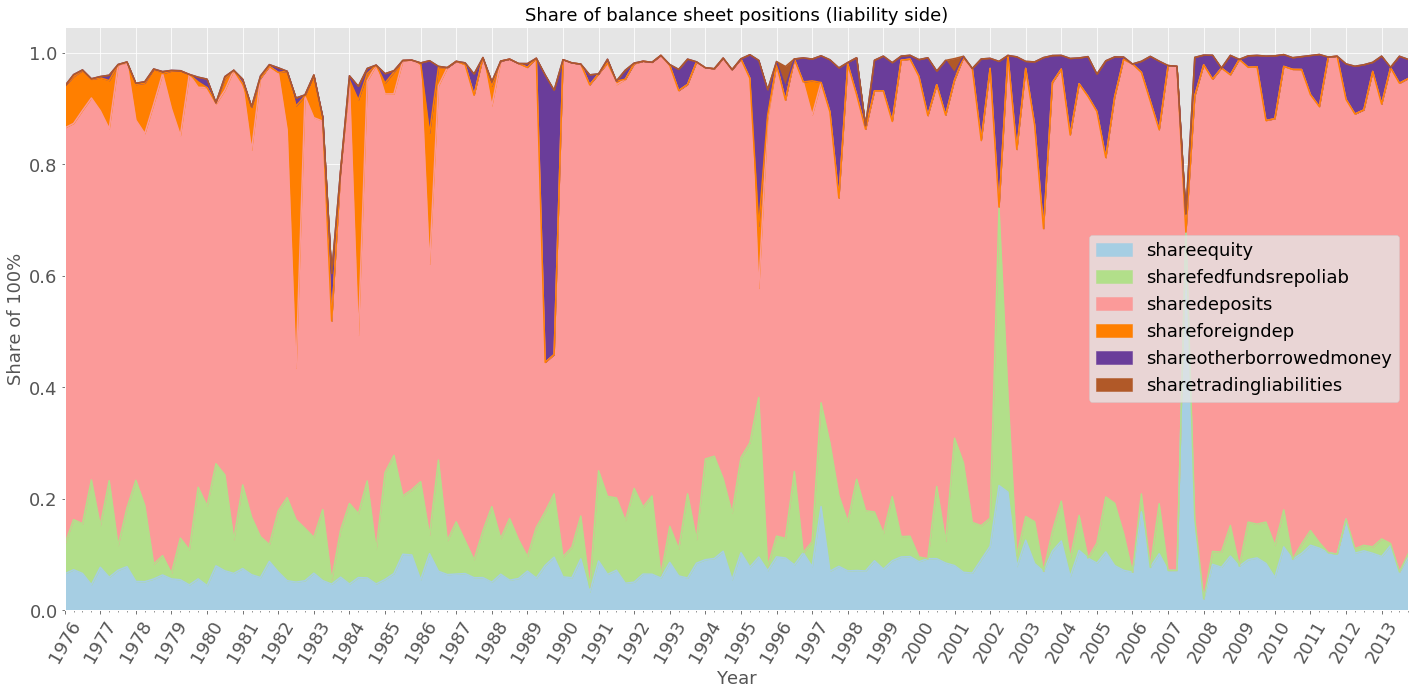

In [304]:
fig, ax = plt.subplots(figsize=(20,10))
years = [str(year) for year in range(1976, 2014)]
ax.set_xticks(range(0,152,4))
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.set_title("Share of balance sheet positions (liability side)")
ax.set_ylabel("Share of 100%")
#df_agg.assets.plot(ax=ax)
viridis = cm.get_cmap('Paired', 12)
df_agg_share.plot.area(ax=ax, colormap=viridis)
#df_agg.plot.area(ax=ax, y=["shareCash","shareFedfundsrepoasset" ,"shareSecurities","shareLoansnet", "shareTradingassets", "shareInterestratederivatives", "shareOtherassets"])
ax.set_xticklabels(years, rotation=60)
ax.legend()
ax.set_xlabel("Year")
ax.grid(True)
plt.tight_layout()
plt.savefig('LatexVorlage/graphs/DescriptiveStats/MedianBank_ShareofLiabilitiesMediumBank_7613.png')

In [305]:
df_big_banks_median_liab

rssdid                          name    year  quarter      assets     equity  fedfundsrepoliab    deposits  foreigndep  otherborrowedmoney  tradingliabilities  liabilities
year   quarter                                                                                                                                                                                
1976.0 1.0       852218.0                   CHEMICAL BK  1976.0      1.0  23006895.0   939341.0         1353278.0  12395973.0   6356852.0            295308.0                 NaN   22067554.0
       2.0       279431.0  CONTINENTAL IL NB&TC CHICAGO  1976.0      2.0  20701793.0   903374.0         3272707.0   9133379.0   6543773.0            189814.0                 NaN   19798419.0
       3.0       279431.0        CONTINENTAL IL NB&TC C  1976.0      3.0  20770637.0   916702.0         3373356.0   9069048.0   6680779.0            216594.0                 NaN   19853935.0
       4.0       214807.0                    BANKERS TC  1976.0      4.0  21759871.0   879568.0         1157312.0   9018471.0   8066720.0            988704.0                 NaN   20880303.0
1977.0 1.0       279431.0        CONTINENTAL IL NB&TC C  1977.0      1.0  21769519.0  1048892.0         4190785.0   8378041.0   7271197.0            202021.0                 NaN   20720627.0
       2.0       279431.0  CONTINENTAL IL NB&TC CHICAGO  1977.0      2.0  22171807.0  1070273.0         3943791.0   9421417.0   7128504.0            231538.0                 NaN   21101534.0
       3.0       214807.0                    BANKERS TC  1977.0      3.0  21572537.0   896598.0         1443610.0   8688975.0   7594685.0            926260.0                 NaN   20675939.0
       4.0       214807.0                    BANKERS TC  1977.0      4.0  22800123.0   955141.0         2205834.0   9344726.0   7352053.0           1080101.0                 NaN   21844982.0
1978.0 1.0       214807.0                    BANKERS TC  1978.0      1.0  22902366.0   982890.0         2524243.0   8674400.0   7554044.0           1079475.0                 NaN   21919476.0
       2.0       214807.0                    BANKERS TC  1978.0      2.0  24133536.0   990424.0         1916266.0   9719720.0   8231558.0           1092581.0                 NaN   23143112.0
       3.0       214807.0                    BANKERS TC  1978.0      3.0  24383281.0   999450.0         2386182.0   9954252.0   7886654.0           1149280.0                 NaN   23383831.0
       4.0       173333.0           FIRST NB OF CHICAGO  1978.0      4.0  22797564.0  1011797.0         1942532.0   9771800.0   7757064.0            444058.0                 NaN   21785767.0
1979.0 1.0       173333.0           FIRST NB OF CHICAGO  1979.0      1.0  23916333.0  1018962.0         2754447.0   8692494.0   9553320.0            583024.0                 NaN   22897371.0
       2.0       173333.0           FIRST NB OF CHICAGO  1979.0      2.0  24715275.0  1047059.0         3603203.0   8085917.0   9367107.0            541784.0                 NaN   23668216.0
       3.0       173333.0           FIRST NB OF CHICAGO  1979.0      3.0  26458523.0  1063259.0         3235338.0   8599460.0  10915732.0            553647.0                 NaN   25395264.0
       4.0       173333.0           FIRST NB OF CHICAGO  1979.0      4.0  28984832.0  1069320.0         4055735.0   9033207.0  12136752.0            462574.0                 NaN   27915512.0
1980.0 1.0       214807.0                    BANKERS TC  1980.0      1.0  27917440.0  1085827.0         2076651.0   9884241.0  10295337.0           2002873.0                 NaN   26831613.0
       2.0       173333.0           FIRST NB OF CHICAGO  1980.0      2.0  26804391.0  1082791.0         2242704.0   8770636.0  12014333.0            454651.0                 NaN   25721600.0
       3.0       753267.0           SECURITY PACIFIC NB  1980.0      3.0  25463988.0  1159872.0         1634131.0  16379396.0   3720524.0            521027.0                 NaN   24304116.0
       4

In [306]:
df_middle_banks_median_liab


rssdid     assets     equity  fedfundsrepoliab   deposits  foreigndep  otherborrowedmoney  tradingliabilities  liabilities
year   quarter                                                                                                                               
1976.0 1.0       971801.0  1722499.0   112089.0           90194.0  1287422.0    128821.0               373.0                 NaN    1610410.0
       2.0       672715.0  1681096.0   121676.0          151198.0  1194720.0    141418.0              5814.0                 NaN    1559420.0
       3.0         2509.0  1713458.0   112501.0          153040.0  1270395.0    122213.0              2156.0                 NaN    1600957.0
       4.0       914808.0  1733944.0    78857.0          325887.0  1188004.0     57995.0              1825.0                 NaN    1655087.0
1977.0 1.0       672715.0  1659917.0   127388.0          124573.0  1235015.0     97737.0              3973.0                 NaN    1532529.0
       2.0        35301.0  1699883.0   100103.0          294570.0  1073198.0    146784.0             16310.0                 NaN    1599780.0
       3.0       519940.0  1657443.0   118515.0           73340.0  1429305.0         0.0              1011.0                 NaN    1538928.0
       4.0       873138.0  1526673.0   118761.0          160766.0  1218568.0      2865.0                 0.0                 NaN    1407912.0
1978.0 1.0       913904.0  1612875.0    82780.0          292780.0  1042008.0    102916.0              3691.0                 NaN    1530095.0
       2.0       913904.0  1655533.0    84354.0          226095.0  1104621.0    149485.0              4602.0                 NaN    1571179.0
       3.0       795968.0  1611167.0    89872.0           43000.0  1329020.0    101049.0               878.0                 NaN    1521295.0
       4.0       757322.0  1686307.0   106250.0           58413.0  1458163.0         0.0              6032.0                 NaN    1580057.0
1979.0 1.0       795968.0  1726006.0    96467.0           17825.0  1437725.0    116757.0              2189.0                 NaN    1629539.0
       2.0       256722.0  1768883.0    96165.0          132250.0  1277415.0    205604.0                 0.0                 NaN    1672718.0
       3.0       508168.0  1798761.0    81291.0          113051.0  1533490.0       240.0               442.0                 NaN    1717470.0
       4.0       940348.0  1828343.0   102339.0          300449.0  1311847.0     17550.0             15536.0                 NaN    1726004.0
1980.0 1.0       531719.0  1808332.0    79491.0          258494.0  1356665.0         0.0             27514.0                 NaN    1728841.0
       2.0       675332.0  1843476.0   146188.0          337727.0  1189497.0      3000.0              1068.0                 NaN    1697288.0
       3.0       376255.0  1825008.0   128504.0          314041.0  1259477.0     36600.0              7807.0                 NaN    1696504.0
       4.0       177014.0  1892955.0   124595.0          114531.0  1593972.0         0.0                 0.0                 NaN    1768360.0
1981.0 1.0       245333.0  1829561.0   136154.0          274553.0  1315278.0         0.0             16448.0                 NaN    1693407.0
       2.0       554008.0  1844217.0   116951.0          190663.0  1213880.0    141178.0              2508.0                 NaN    1727266.0
       3.0       594723.0  1887972.0   110302.0          138407.0  1552088.0         0.0              7950.0                 NaN    1777670.0
       4.0       289467.0  1965528.0   171602.0           59389.0  1685785.0         0.0              6394.0                 NaN    1793926.0
1982.0 1.0       605469.0  2008669.0   137443.0          219681.0  1579788.0         0.0             17000.0                 NaN    1871226.0
       2.0       934011.0  2051920.0   108173.0          305679.0  1353348.0    215958.0                 0.0                 NaN    1943747.0
       3.0       958615.0  2065061.0   1036

Big Bank

In [307]:
df_big_banks_median_liab.drop(["name","year", "quarter"], axis=1, inplace=True)

df_agg_share = pd.DataFrame()

for (columnName, columnData) in df_big_banks_median_liab.iteritems():
    newcolumn = "share" + columnName
    df_agg_share[newcolumn] = df_big_banks_median_liab[columnName]/df_big_banks_median_liab.assets
    
    
df_agg_share.drop(["sharerssdid" , "shareassets", "shareliabilities"], axis=1, inplace=True)

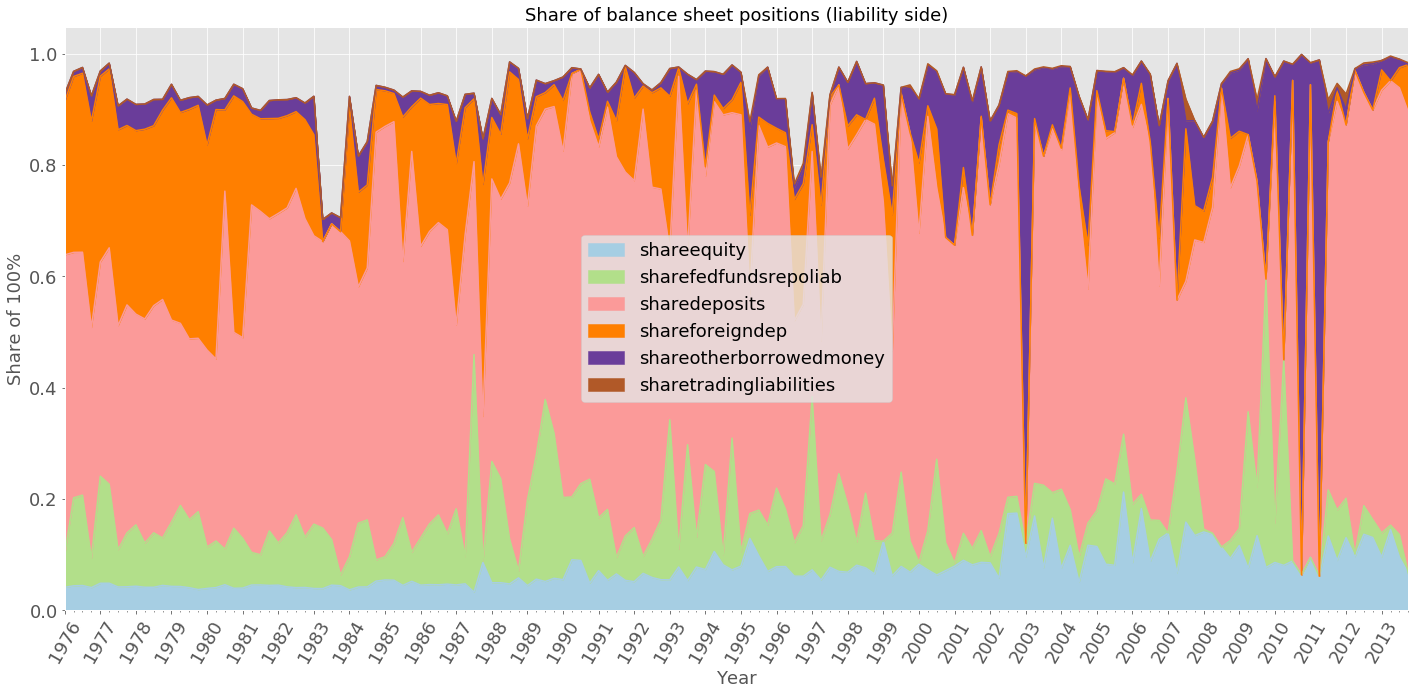

In [308]:
fig, ax = plt.subplots(figsize=(20,10))
years = [str(year) for year in range(1976, 2014)]
ax.set_xticks(range(0,152,4))
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.set_title("Share of balance sheet positions (liability side)")
ax.set_ylabel("Share of 100%")
#df_agg.assets.plot(ax=ax)
viridis = cm.get_cmap('Paired', 12)
df_agg_share.plot.area(ax=ax, colormap=viridis)
#df_agg.plot.area(ax=ax, y=["shareCash","shareFedfundsrepoasset" ,"shareSecurities","shareLoansnet", "shareTradingassets", "shareInterestratederivatives", "shareOtherassets"])
ax.set_xticklabels(years, rotation=60)
ax.legend()
ax.set_xlabel("Year")
ax.grid(True)
plt.tight_layout()
plt.savefig('LatexVorlage/graphs/DescriptiveStats/MedianBank_ShareofLiabilitiesBigBank_7613.png')